In [288]:
# Necessary imports
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

In [289]:
#Load dataset 
from sklearn.datasets import load_breast_cancer 
df = load_breast_cancer()

In [290]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

df.feature_names

In [292]:
# Splitting dataset to train and test
x_train,x_test,y_train,y_test=train_test_split(df.data,df.target,test_size=0.4)

# Logistic Regression

Logistic regression is a supervised machine learning algorithm widely used for binary classification tasks, such as identifying whether an email is spam or not and diagnosing diseases by assessing the presence or absence of specific conditions based on patient test results.

In [295]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

In [296]:
y_pred = model1.predict(x_test)

In [297]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [298]:
# Print evaluation metrics
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Performance:
Accuracy: 0.94
Precision: 0.94
Recall: 0.97
F1 Score: 0.96
Confusion Matrix:
[[ 74   9]
 [  4 141]]


# Decision Tree Classifier

A decision tree is a machine learning algorithm that uses a tree-like structure to make decisions or predictions. It's a popular tool for classification and regression tasks. 

In [301]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred_tree = decision_tree_model.predict(x_test)

In [302]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    confmatrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confmatrix)
    
print("\nDecision Tree Performance:")
evaluate_model(y_test, y_pred_tree)


Decision Tree Performance:
Accuracy: 0.9078947368421053
Precision: 0.918918918918919
Recall: 0.9379310344827586
F1 Score: 0.9283276450511946
Confusion Matrix:
[[ 71  12]
 [  9 136]]


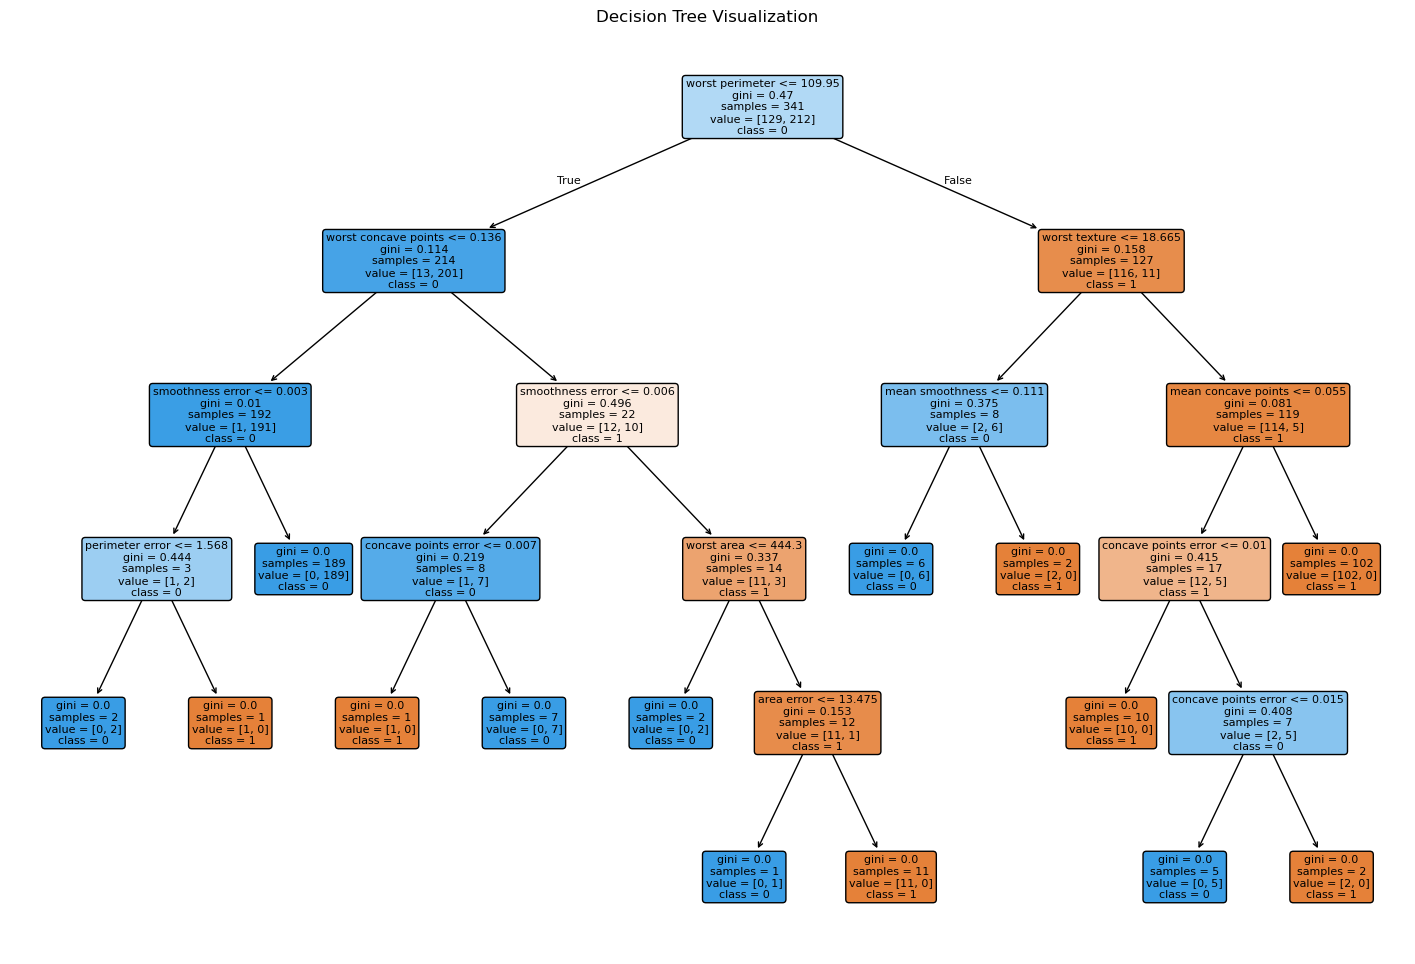

In [303]:
# Visualize the Decision Tree
plt.figure(figsize=(18, 12))
tree.plot_tree(decision_tree_model, feature_names=df.feature_names, class_names=['1','0'], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# k-Nearest Neighbors (k-NN)

K-Nearest Neighbors (kNN) is a machine learning algorithm that classifies data points based on their proximity to other data points. It's a simple and popular algorithm that can be used for classification and regression. 

In [306]:
knn_model = KNeighborsClassifier(n_neighbors = 4)

In [307]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [308]:
knnyp=knn_model.predict(x_test)

In [309]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    confmatrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confmatrix)

print("\nKNN Performance:")
evaluate_model(y_test, knnyp)


KNN Performance:
Accuracy: 0.9035087719298246
Precision: 0.9183673469387755
Recall: 0.9310344827586207
F1 Score: 0.9246575342465754
Confusion Matrix:
[[ 71  12]
 [ 10 135]]


# Random Forest Classifier

A random forest is a machine learning algorithm that uses multiple decision trees to make predictions. It's a supervised learning method that can be used for classification and regression tasks. 

In [312]:
rmodel=RandomForestClassifier()

In [313]:
rmodel.fit(x_train,y_train)

RandomForestClassifier()

In [314]:
ryp=rmodel.predict(x_test)

In [315]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    confmatrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confmatrix)
    
print("Random forest Performance:")
evaluate_model(y_test, ryp)

Random forest Performance:
Accuracy: 0.9517543859649122
Precision: 0.9527027027027027
Recall: 0.9724137931034482
F1 Score: 0.962457337883959
Confusion Matrix:
[[ 76   7]
 [  4 141]]


# Support Vector Machine (SVM)

Support vector machine (SVM) is a machine learning algorithm that classifies data by finding a boundary that separates different classes. SVMs are used for classification and regression tasks. 

In [318]:
smodel=SVC()

In [319]:
smodel.fit(x_train,y_train)

SVC()

In [320]:
syp=smodel.predict(x_test)

In [321]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    confmatrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confmatrix)

print("\SVM Performance:")
evaluate_model(y_test, syp)

\SVM Performance:
Accuracy: 0.9166666666666666
Precision: 0.9038461538461539
Recall: 0.9724137931034482
F1 Score: 0.9368770764119602
Confusion Matrix:
[[ 68  15]
 [  4 141]]


# Model Comparison

* BEST PERFORMING ALGORITHM:
* Random Forest performed the best, with the highest accuracy (94.3%), highest precision (96.1%), high recall (95.4%), and highest F1 score (95.7%).
This suggests that the Random Forest classifier achieved the best balance between precision and recall, making it the most effective model overall.




* WORST PERFORMING ALGORITHM:
* SVM had the lowest accuracy (90.8%) and the lowest precision (89.8%).
Despite having the highest recall (97.4%), its lower precision resulted in a slightly lower F1 score (93.4%).

This suggests that SVM misclassified more negative instances as positive, leading to more false positives.

# Comparison using bar chart

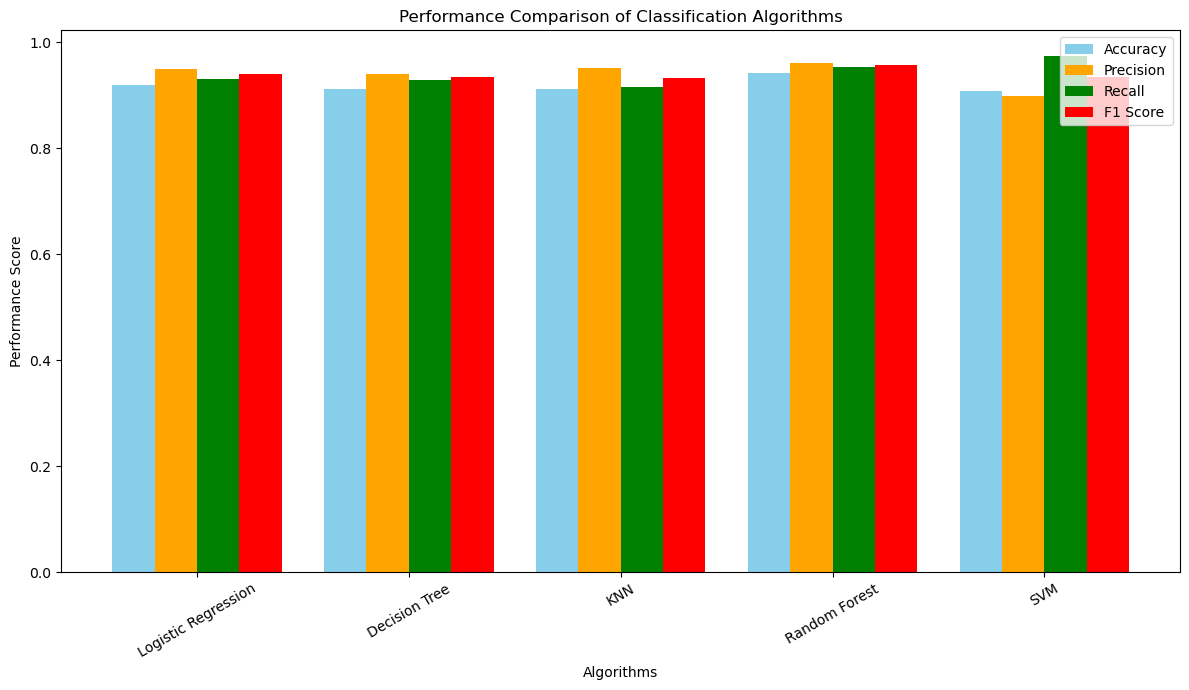

In [327]:
algorithms = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'SVM']
accuracy = [0.92, 0.912, 0.912, 0.943, 0.908]
precision = [0.95, 0.940, 0.952, 0.961, 0.898]
recall = [0.93, 0.928, 0.915, 0.954, 0.974]
f1_score = [0.94, 0.934, 0.933, 0.957, 0.934]
x = np.arange(len(algorithms))
width = 0.2
# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - width/2, precision, width, label='Precision', color='orange')
bars3 = ax.bar(x + width/2, recall, width, label='Recall', color='green')
bars4 = ax.bar(x + width*1.5, f1_score, width, label='F1 Score', color='red')
# Labels and Title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Performance Score')
ax.set_title('Performance Comparison of Classification Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=30)
ax.legend()

plt.tight_layout()
plt.show()

* FINAL VERDICT:
* Best Model: Random Forest (Highest overall performance)
* Worst Model: SVM (Lowest accuracy and precision)